In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

Using TensorFlow backend.


In [2]:
#one hot encode
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
from keras import models
from keras import layers
import numpy as np
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#from keras import optimizers
#network.compile(optimizer=optimizers.rmsprop(lr=0.03),
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [4]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,validation_data=(test_images,test_labels))

#test_loss, test_acc = network.evaluate(test_images, test_labels)
#print('test_acc:', test_acc)
model.save("cnn_mnist.md")

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.1741 - acc: 0.9455 - val_loss: 0.0437 - val_acc: 0.9856
Epoch 2/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.0450 - acc: 0.9860 - val_loss: 0.0361 - val_acc: 0.9886
Epoch 3/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0302 - val_acc: 0.9907
Epoch 4/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0246 - acc: 0.9924 - val_loss: 0.0407 - val_acc: 0.9890
Epoch 5/5
60000/60000 [==============================] - 6s 106us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0342 - val_acc: 0.9908


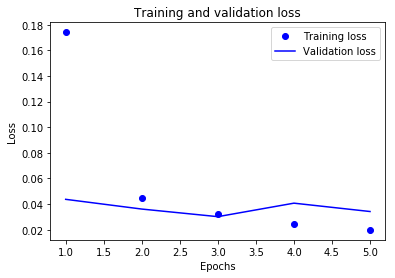

In [6]:
#plot
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

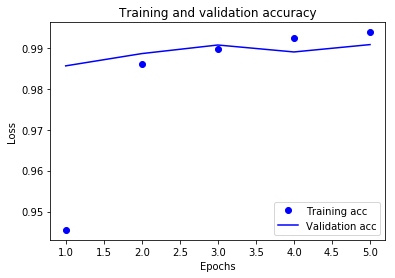

In [7]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()